In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import string
import pandas as pd
import seaborn as sns

In [2]:
score = np.random.normal(75, 15, 1000)

In [3]:
scores = []

mx = max(score)
mn = min(score)

for i in score:
    if i > 100:
        s = 100
    else:
        s = i
    scores.append(s)

In [172]:
scores

[76.82989454123239,
 71.74557984348584,
 61.189337950180274,
 64.49872439248531,
 67.800534712361,
 69.95568767157285,
 72.39569442071986,
 94.71686672752534,
 78.55946029204553,
 71.40668699561739,
 78.45875113221885,
 43.12226023176474,
 80.05424799805868,
 66.8636625395848,
 93.36829410687407,
 59.99326361363205,
 91.1069569491936,
 72.47859154593769,
 90.16822815954166,
 55.24497926001226,
 80.943344506467,
 58.80073093877826,
 65.9178348431033,
 65.61944681650186,
 79.64760743487408,
 53.511984494489326,
 48.940301279587686,
 63.66722130350085,
 83.55074986774437,
 81.4711705545612,
 80.3683685843202,
 84.8946078374928,
 78.83885235136952,
 85.38895279664585,
 61.31343339054437,
 80.90891528875542,
 55.557714220254695,
 49.78236853370441,
 73.11393897542315,
 91.47740947495035,
 72.75308734159152,
 97.25175971461596,
 70.85055598100024,
 68.96919424846169,
 73.73171160516803,
 58.66590219781816,
 85.23237265371802,
 57.39549540882324,
 51.25395192715639,
 76.84606348984329,
 78.74

In [4]:
percent_corrects = np.random.normal(50, 20, 1000)

In [5]:
percent_correct = []

mx = max(percent_corrects)
mn = min(percent_corrects)

for i in percent_corrects:
     if i > 100:
        s = 100
     else:
        s = i
     percent_correct.append(s)

In [6]:
students = []
for i in range(100):
    students.append(list(string.ascii_lowercase[0:10]))

In [7]:
flat_list = []
for sublist in students:
    for item in sublist:
        flat_list.append(item)

In [8]:
assignments = []
for i in range (1000):
    assignment = 'Assignment ' + str(((i%10)+1))
    assignments.append(assignment)

In [9]:
student_scores = pd.DataFrame({'Student': flat_list, 'Assignment': assignments, 'Score': scores, 'Percent correct on 1st attempt': percent_correct})

In [10]:
student_scores.head()

,Student,Assignment,Score,Percent correct on 1st attempt
0,a,Assignment 1,68.790216,44.562140
1,b,Assignment 2,56.973813,27.050258
2,c,Assignment 3,66.195939,14.779360
3,d,Assignment 4,71.449605,22.756811
4,e,Assignment 5,65.799483,38.238588


In [11]:
student_scores['Score quantile'] = pd.qcut(student_scores['Score'], 5, labels=False)

In [12]:
student_scores['% on 1st quantile'] = pd.qcut(student_scores['Percent correct on 1st attempt'], 5, labels=False)

ValueError: Could not interpret input 'quantile'

<Figure size 432x288 with 0 Axes>

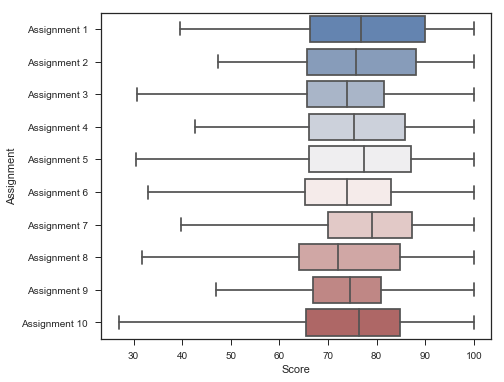

In [13]:
plt.gcf().clear()

#ax = plt.subplot(2,1,1)

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Score", y="Assignment", data=student_scores,
            whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="Score", y="Assignment", hue='quantile', data=student_scores,
              size=4, linewidth=0, palette= sns.color_palette("RdYlGn", 5))

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


<Figure size 432x288 with 0 Axes>

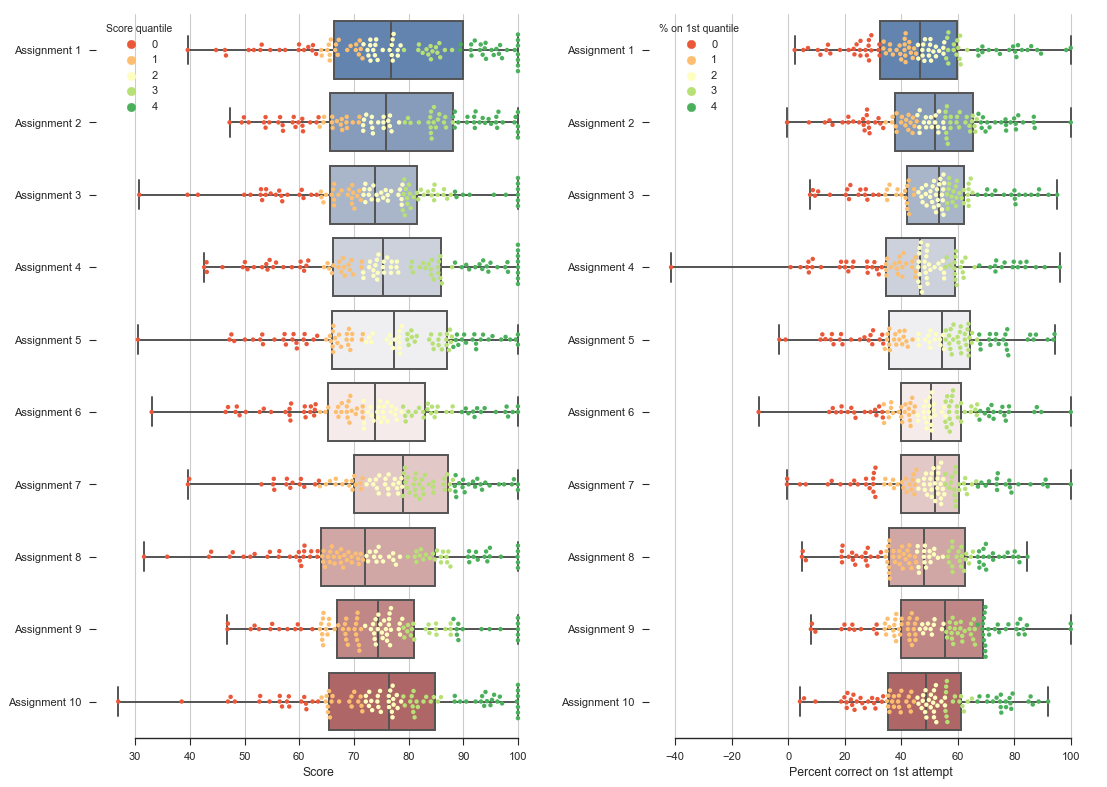

In [14]:
plt.gcf().clear()
from matplotlib.pyplot import figure

figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(1,2,1)

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
ax.set_xscale("linear")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Score", y="Assignment", data=student_scores,
            whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="Score", y="Assignment", data=student_scores,
              size=4, hue="Score quantile",  palette= sns.color_palette("RdYlGn", 5), linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


ax = plt.subplot(1,2,2)
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
ax.set_xscale("linear")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Percent correct on 1st attempt", y="Assignment", data=student_scores,
            whis="range", palette='vlag')

# Add in points to show each observation
sns.swarmplot(x="Percent correct on 1st attempt", y="Assignment", data=student_scores,
              size=4, hue="% on 1st quantile", palette= sns.color_palette("RdYlGn", 5), linewidth=0, alpha = 1)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

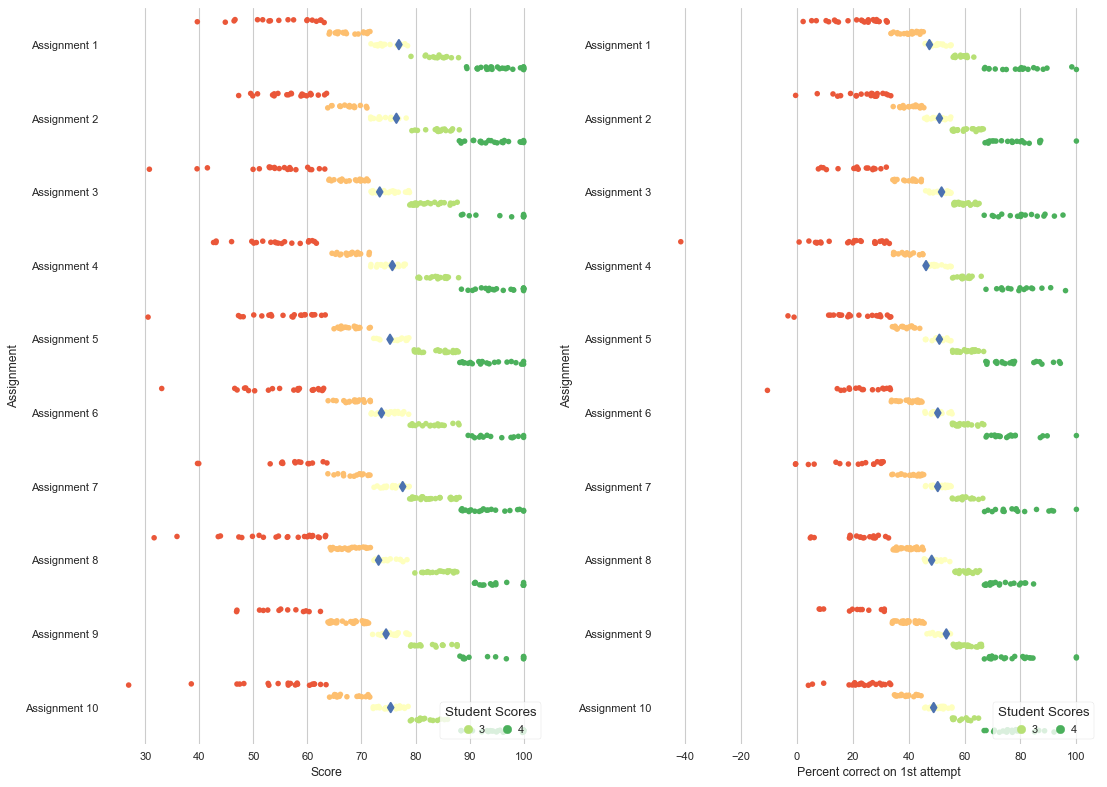

In [15]:
plt.gcf().clear()
sns.set(style="whitegrid")

# Initialize the figure
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(1,2,1)

sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="Score", y="Assignment", hue = 'Score quantile',
              data=student_scores, dodge=True, jitter=True, palette=sns.color_palette("RdYlGn", 5),
               zorder=1)

# Show the conditional means
sns.pointplot(x="Score", y="Assignment",
              data=student_scores, dodge=.532, join=False,
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Student Scores",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

ax = plt.subplot(1,2,2)

sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="Percent correct on 1st attempt", y="Assignment", hue = '% on 1st quantile',
              data=student_scores, dodge=True, jitter=True, palette=sns.color_palette("RdYlGn", 5),
               zorder=1)

# Show the conditional means
sns.pointplot(x="Percent correct on 1st attempt", y="Assignment",
              data=student_scores, dodge=.532, join=False,
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Student Scores",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

plt.tight_layout()
plt.show()

In [127]:
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

In [128]:
df

network           1                       2                     3             \
node              1                       1                     1              
hemi             lh          rh          lh         rh         lh         rh   
0         56.055744   92.031036    3.391576  38.659683  26.203819 -49.715569   
1         55.547253   43.690075  -65.495987 -13.974523 -28.274963 -39.050129   
2         60.997768   63.438793  -51.108582 -13.561346 -18.842947  -1.214659   
3         18.514868   12.657158  -34.576603 -32.665958  -7.420454  17.119448   
4         -2.527392  -63.104668  -13.814151 -15.837989 -45.216927   3.483550   
5        -24.906792  -51.191895  -29.867994 -27.840294 -24.455107  47.115761   
6         17.273710    0.540083   18.649370  -9.105489  -2.117226  87.957710   
7         20.712934   10.650232    9.156902 -15.880466   1.948806  51.916603   
8         48.215309   46.369450   30.311281  21.030554 -14.135849  13.317879   
9          2.632546   33.998898    8.142659  42.572460   0.644133   9.879410   
10        25.925964  -15.774749   54.659813  80.348549  27.536982  47.937374   
11       -56.421814  -74.313713  -22.430784  22.268995  29.032286  73.269424   
12       -20.486719  -18.707275   -8.405787  10.911598   6.834342  33.627548   
13       -29.466019  -38.972973  -44.623367 -15.115207 -12.154548  -7.261045   
14        -4.389784  -47.513359   37.163383  -2.465017   1.309325 -23.852072   
15       -18.445438  -13.101379   29.976654  23.518087   2.768352 -34.169147   
16        -4.452083   17.155952   33.558407  34.397972  -5.863379   9.208533   
17       -39.546295  -18.957148   -7.976241  -3.531079  -5.773846   9.264918   
18       -46.291134   11.078963  -45.228870  -2.845282  -6.179867  20.131891   
19        -5.899357    4.405512    0.080728   1.270900   1.275138   7.154182   
20         0.560453   35.866219   24.450027  31.679840  16.254498  90.163155   
21       -19.945114   24.615583   49.798931  30.973711  10.343500  13.126060   
22       -16.305347  -15.824549   37.724072  47.291103  -3.805740 -56.306465   
23       -18.826845  -31.083115   -6.768690 -34.910385   6.819852 -77.991852   
24       -68.351372  -47.328667  -10.660748 -17.210674  15.157654 -85.323883   
25       -41.239174  -36.231346    8.018161 -29.044682  -2.452334 -74.277328   
26       -37.635246  -32.697514   35.461830 -22.198782   5.855732 -79.205887   
27        -7.205924  -22.471235   -3.246131 -30.879417 -20.528399 -82.332359   
28        20.751831   -7.137496   16.544254 -30.701252  22.778231 -83.647842   
29       -15.386735  -27.222279   36.951057   2.286964  25.375914 -22.884146   
..              ...         ...         ...        ...        ...        ...   
890      -21.066452   -7.763554    5.813338  26.766722   3.434278  24.014647   
891        4.738699   -0.531491  -24.333563  12.450525   8.395144  16.778339   
892      -15.034314    7.501511   -3.909041   2.961851  20.520329   3.353428   
893       -2.246749    8.323643  -34.524612 -16.084988  -2.813310  -9.039646   
894       30.750069   10.525861  -43.919830 -29.727776  -7.223209  -7.573327   
895      163.615540  152.108368  111.501564  81.281372 -21.596678  -8.815574   
896       24.541935  -29.396801  -77.736732 -36.493420  25.047535   1.863015   
897     -109.933723 -103.237183  -55.536781 -34.571960  21.071434  11.164051   
898     -108.607208 -104.835846  -41.391678 -42.093185   4.437909  27.703983   
899     -112.576164  -98.228836   -4.219810  -4.817594  43.134716  51.471874   
900      -33.652763  -34.227898   41.866615  13.277394  38.052265  42.057190   
901      -17.347198  -33.566647   10.761894 -21.481064  42.512058  82.237091   
902      -13.736854  -35.782627  -25.390673 -16.989786  13.662337  92.381088   
903      -18.138809  -26.413460   -2.212636  -3.235288   6.499053  76.702705   
904        5.245887   -1.838824   15.719844  -5.537140  -2.017576  43.350071   
905       10.630086    9.432680   17.886751   1.664860 -11.843624   0.269342   


In [131]:
corr_df

network                  1         3         4         5         6         7   \
network node hemi                                                               
1       1    lh    0.940758 -0.256174 -0.367388  0.425164 -0.057770 -0.275816   
             rh    0.940758 -0.256757 -0.335360  0.475935 -0.012364 -0.229890   
3       1    lh   -0.347179  0.776591  0.516095 -0.171081  0.195136  0.215233   
             rh   -0.165752  0.776591  0.328505 -0.098206  0.192752  0.133581   
4       1    lh   -0.353147  0.415503  0.907364 -0.234307  0.131866  0.366093   
             rh   -0.349601  0.429097  0.907364 -0.253040  0.087337  0.302202   
5       1    lh    0.431786 -0.129167 -0.230126  0.911449  0.275379 -0.103652   
             rh    0.469312 -0.140120 -0.257221  0.911449  0.267579 -0.108846   
6       1    lh   -0.060177  0.135988  0.157311  0.255603  0.573441  0.283326   
             rh    0.002677  0.187955  0.088655  0.401885  0.626314  0.320228   
        2    lh   -0.063111  0.198762  0.098668  0.167566  0.525855  0.280571   
             rh   -0.019657  0.253069  0.093774  0.260862  0.558416  0.255603   
7       1    lh   -0.308897  0.179203  0.446087 -0.231505  0.190905  0.619272   
             rh   -0.267666  0.302085  0.367882 -0.080596  0.322854  0.638759   
        2    lh   -0.363550  0.269359  0.386652 -0.193413  0.232189  0.589295   
             rh   -0.299915  0.195221  0.373569 -0.183673  0.238991  0.631601   
        3    lh   -0.169581  0.040143  0.209373 -0.023062  0.335749  0.630577   
             rh   -0.107509  0.060432  0.221321  0.074753  0.388904  0.609847   
8       1    lh   -0.362722 -0.041814  0.017239 -0.372297 -0.036357  0.242871   
             rh   -0.395465 -0.101148 -0.001599 -0.328916 -0.023428  0.278742   
        2    lh   -0.327407  0.042754  0.225405 -0.262639  0.013079  0.351678   
             rh   -0.351986 -0.050748  0.180573 -0.253869  0.018649  0.345331   
        3    lh   -0.328728  0.050446  0.191949 -0.386714 -0.091193  0.223598   
             rh   -0.346915 -0.055209  0.104059 -0.319216 -0.012644  0.259593   
11      1    lh   -0.390837 -0.165437 -0.113477 -0.326487 -0.151778 -0.016966   
             rh   -0.325613 -0.251598 -0.182579 -0.254397 -0.185779 -0.024879   
12      1    lh   -0.081245 -0.003014 -0.096756  0.065704 -0.016985 -0.082187   
             rh   -0.005003 -0.154205 -0.233232  0.271565  0.005511 -0.124928   
        2    lh   -0.144306 -0.104950 -0.093288  0.054061  0.017861 -0.063382   
             rh   -0.165468 -0.200529 -0.175035  0.118745  0.061267 -0.068240   
        3    lh    0.101941 -0.092667 -0.171226  0.274896  0.022077 -0.070303   
13      1    lh   -0.292910 -0.044116 -0.029003 -0.416276 -0.223246 -0.143748   
             rh   -0.302794 -0.185629 -0.110968 -0.353713 -0.249628 -0.152438   
        2    lh   -0.372171 -0.087494 -0.014240 -0.384041 -0.171167 -0.075785   
             rh   -0.366963 -0.224465 -0.082330 -0.307075 -0.175352 -0.133249   
        3    rh   -0.361620 -0.266432 -0.141589 -0.309276 -0.216471 -0.120135   
        4    rh   -0.127895 -0.152299 -0.149943 -0.061396 -0.215815 -0.239260   
16      1    lh   -0.277935 -0.044072  0.053009 -0.522852 -0.281449 -0.109069   
             rh   -0.254489 -0.123365  0.027710 -0.442857 -0.236872 -0.048568   
        2    lh   -0.207364 -0.085406 -0.117661 -0.382675 -0.303127 -0.312413   
             rh   -0.195588 -0.156142 -0.168529 -0.357103 -0.318181 -0.275175   
        3    lh   -0.319227 -0.009973  0.072408 -0.437266 -0.196470 -0.127336   
             rh   -0.140086 -0.127235 -0.198590 -0.147307 -0.212007 -0.324507   
        4    lh   -0.193345 -0.020757 -0.110339 -0.260617 -0.241499 -0.354396   
             rh   -0.255228 -0.169474 -0.041459 -0.305370 -0.250977 -0.191898   
17      1    lh   -0.156373 -0.045172 -0.117414 -0.187305 -0.207832 -0.268622   
             rh   -0.212282 -0.163731 -0.203751 -0.240847 -0.211418 -0.215853   
        2    lh   -0.239874 -0.

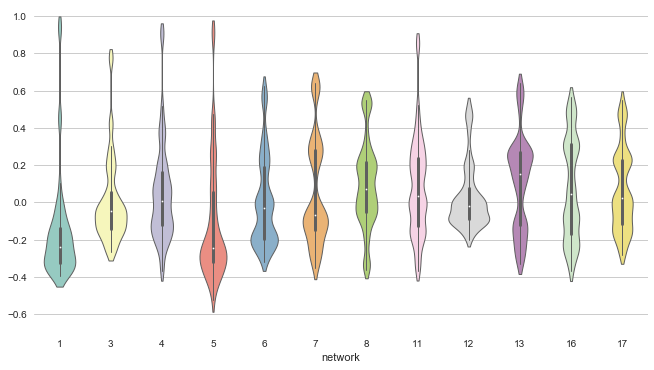

In [130]:
sns.set(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)